# Annalyse de données DVF

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
sns.set_theme()

## **API Mutation**

In [5]:
# Chargement de la donnée
api_mutations = "https://dvfapp.fly.dev/api/global/nature_mutation/"
response = requests.get(api_mutations).json()
data = pd.DataFrame(response)
data

,libnatmut,nombre_de_mutation,pourcentage
0,Expropriation,22,0.04
1,Echange,264,0.45
2,Adjudication,367,0.63
3,Vente terrain à bâtir,1328,2.27
4,Vente en l'état futur d'achèvement,3380,5.79
5,Vente,53035,90.82


In [24]:
# Chargement de la donnée
api_mutations = "https://dvfapp.fly.dev/api/global/vente/"
response = requests.get(api_mutations).json()
data = pd.DataFrame(response)
data = data.head(-1)

<AxesSubplot:xlabel='anneemut'>

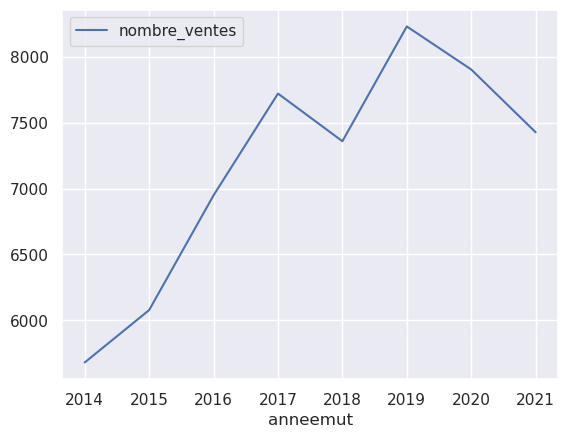

In [68]:
data["nombre_ventes"] = data['nombre_ventes'].astype('float')
# data.plot(x = "anneemut",kind = "bar")

data_cumsum = pd.DataFrame({
    'cumsum' : data["nombre_ventes"].cumsum(),
    'nb_ventes' : data["nombre_ventes"],
    'anneemut' : data['anneemut']
})

fig , ax = plt.subplots()

data.plot(kind = "line", x = 'anneemut', y = 'nombre_ventes' ,ax = ax)
# data_cumsum[['cumsum','anneemut']].plot(kind = "bar",x = 'anneemut', ax = ax)

In [96]:
# Chargement de la donnée
api_mutations = "https://dvfapp.fly.dev/api/commune/type_local"
response = requests.get(api_mutations).json()
data = pd.DataFrame(response)
# data = data.head()
data


,anneemut,nombre_de_locaux,nombre_de_maisons,nombre_d_appartements,nombre_de_logements,nombre_de_dependance,nombre_de_locaux_activites
0,2014,7468,2515,2556,5071,2128,269
1,2015,7886,2585,2726,5311,2250,325
2,2016,8732,3045,2847,5892,2523,317
3,2017,10336,3434,3443,6877,3001,458
4,2018,11544,3636,4396,8032,3017,495
5,2019,14009,3917,6088,10005,3486,518
6,2020,16442,3669,7034,10703,5067,672
7,2021,12359,3228,4324,7552,4331,476
8,2022,1527,472,448,920,542,65


<AxesSubplot:xlabel='anneemut'>

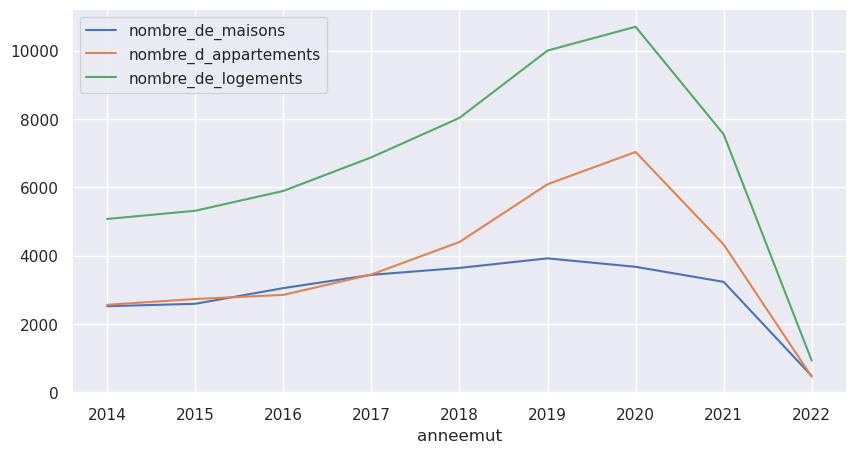

In [100]:
data = data.astype('int')

fig , ax = plt.subplots(figsize=(10,5))

data[['anneemut','nombre_de_maisons']].plot(kind = "line", x = "anneemut",ax = ax)
data[['anneemut','nombre_d_appartements']].plot(kind = "line", x = "anneemut",ax = ax)
data[['anneemut','nombre_de_logements']].plot(kind = "line", x = "anneemut",ax = ax)

<AxesSubplot:xlabel='anneemut'>

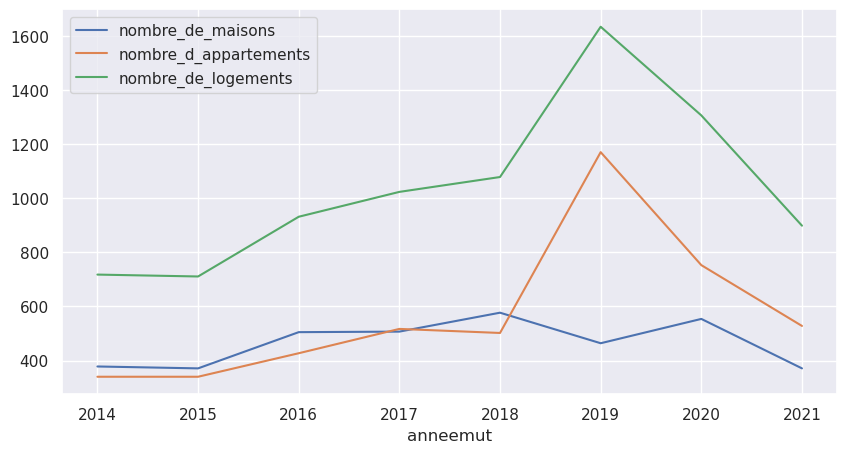

In [104]:
# Chargement de la donnée
api_mutations = "https://dvfapp.fly.dev/api/commune/type_local/97415"
response = requests.get(api_mutations).json()
data = pd.DataFrame(response)
data = data.head(-1)
data

data = data.astype('int')

fig , ax = plt.subplots(figsize=(10,5))

data[['anneemut','nombre_de_maisons']].plot(kind = "line", x = "anneemut",ax = ax)
data[['anneemut','nombre_d_appartements']].plot(kind = "line", x = "anneemut",ax = ax)
data[['anneemut','nombre_de_logements']].plot(kind = "line", x = "anneemut",ax = ax)
